## Importación de base de datos y construcción de DataFrame  

Importamos librerías 

In [211]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Importamos la base de datos directamente desde el repositorio proyecto_analitica de Github

In [212]:
! git clone https://github.com/EstebanCaroP/proyecto_analitica.git
%cd proyecto_analitica


Cloning into 'proyecto_analitica'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 8.64 MiB | 7.91 MiB/s, done.
/content/proyecto_analitica/proyecto_analitica/proyecto_analitica


In [213]:
conn = sqlite3.connect("BD_insurance2019dataset.db")

In [214]:
cursor = conn.cursor()

Creamos un dataframe para cada una de las tablas de la base de datos 

### DataFrame Diagnosticos

In [215]:
df_diagnosticos = pd.DataFrame(cursor.execute('''
SELECT *
FROM diagnosticos''').fetchall())

df_diagnosticos.columns = ['Codigo','Descripción']
df_diagnosticos.index = df_diagnosticos['Codigo']

#Tranformación 1 Borrado de  columna repetida de Codigo
df_diagnosticos = df_diagnosticos.drop('Codigo', axis = 1)
df_diagnosticos


,Descripción
Codigo,
-1,Sin Información
0,DIAGNÓSTICO PENDIENTE
9,DIAGNÓSTICO PENDIENTE
A010,FIEBRE TIFOIDEA
A021,SEPTICEMIA DEBIDA A SALMONELLA
...,...
Z961,PRESENCIA DE LENTES INTRAOCULARES
Z966,PRESENCIA DE IMPLANTE ORTOPÉDICO ARTICULAR
Z975,PRESENCIA DE DISPOSITIVO ANTICONCEPTIVO (INTRA...


### DataFrame Género

In [216]:
df_genero = pd.DataFrame(cursor.execute('''
SELECT *
FROM genero''').fetchall())

df_genero.columns = ['Genero','Descripción']
df_genero.index = df_genero['Genero']

#Tranformación 2 Borrado de  columna repetida de Genero
df_genero = df_genero.drop('Genero', axis = 1)
df_genero

,Descripción
Genero,
M,Masculino
F,Femenino
-1,Sin Informacion


### DataFrame Reclamaciones

In [217]:
df_reclamaciones = pd.DataFrame(cursor.execute('''
SELECT *
FROM reclamaciones''').fetchall())

df_reclamaciones.columns = ['ID','Descripción']
df_reclamaciones.index = df_reclamaciones['ID']

#Tranformación 3 Borrado de  columna repetida de ID
df_reclamaciones = df_reclamaciones.drop('ID', axis = 1)
df_reclamaciones

,Descripción
ID,
1,ATENCION DEL PARTO
2,ATENCION INTEGRAL DE SALUD MENTAL
3,CIRUGIA AMBULATORIA POR ACCIDENTE
4,CIRUGIA AMBULATORIA POR ENFERMEDAD
5,CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA
6,COBERTURA PROGRAMA PALIATIVOS
7,CONCILIACION
8,CONSULTA DE URGENCIAS
9,CONSULTA EXTERNA


### DataFrame Regionales

In [218]:
df_regionales = pd.DataFrame(cursor.execute('''
SELECT *
FROM regional''').fetchall())

df_regionales.columns = ['ID_Regional','Descripción']
df_regionales.index = df_regionales['ID_Regional']

#Tranformación 4 Borrado de  columna repetida de ID_Regional
df_regionales = df_regionales.drop('ID_Regional', axis = 1)
df_regionales

,Descripción
ID_Regional,
1,REGIONAL ANTIOQUIA
2,REGIONAL CENTRO
3,REGIONAL NORTE
4,REGIONAL OCCIDENTE
5,REGIONAL EJE CAFETERO
6,Sin Información


### DataFrame Sociodemosgráficas

In [219]:
df_sociodemograficas = pd.DataFrame(cursor.execute('''
SELECT *
FROM sociodemograficas''').fetchall())

df_sociodemograficas.columns = ['Afiliado_ID','Genero', 'Fecha_Nacimiento','Regional_Codigo',
                                'Cancer','EPOC','Diabetes','Hipertension','Enf_Cardiovascular' ]
df_sociodemograficas.index = df_sociodemograficas['Afiliado_ID']

#Tranformación 5 Borrado de  columna repetida de Afiliado_ID
df_sociodemograficas = df_sociodemograficas.drop('Afiliado_ID', axis = 1)
df_sociodemograficas

,Genero,Fecha_Nacimiento,Regional_Codigo,Cancer,EPOC,Diabetes,Hipertension,Enf_Cardiovascular
Afiliado_ID,,,,,,,,
738288,M,28072,1,0,0,0,0,0
738294,M,23392,2,0,0,0,0,0
738303,F,27177,3,0,0,0,0,0
738318,M,15053,2,1,0,1,1,0
738323,F,10447,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...
59559606,F,38164,2,0,0,0,0,0
59564764,F,38429,2,0,0,0,0,0
59565065,F,38425,2,0,0,0,0,0


####Transformación 0

In [220]:
lista_enfermedades = [df_sociodemograficas['Cancer'].mean(),
                      df_sociodemograficas['EPOC'].mean(),
                      df_sociodemograficas['Diabetes'].mean(),
                      df_sociodemograficas['Hipertension'].mean(),
                      df_sociodemograficas['Enf_Cardiovascular'].mean()]

lista_enf = []
for i in lista_enfermedades:
  numero = round(i,4)
  lista_enf.append(numero)

dataframe_mediasenf = pd.DataFrame(lista_enf,index=['Cancer','EPOC','Diabetes','Hipertension','Enf_Caardiovascular'],columns=['Promedio'])
dataframe_mediasenf

,Promedio
Cancer,0.02
EPOC,0.01
Diabetes,0.01
Hipertension,0.07
Enf_Caardiovascular,0.00


Los valores dados en el anterior dataframe muestran en promedio cuántas personas tienen cada una de las enfermedades por cada afiliado. El comportamiento de estos valores es natural que sean tan bajos dado que el cálculo se está haciendo sobre ceros y unos. 

### DataFrame Utilizaciones

In [221]:
df_utilizaciones = pd.DataFrame(cursor.execute('''
SELECT *
FROM utilizaciones''').fetchall())

df_utilizaciones.columns = ['Fecha_Reclamacion','Afiliado_ID','Reclamacion_Cod','Diagnostico_Cod','Cantidad','Precio']
df_utilizaciones


,Fecha_Reclamacion,Afiliado_ID,Reclamacion_Cod,Diagnostico_Cod,Cantidad,Precio
0,23/10/2019,22914637,12,M45X,1.00,1056639.96
1,26/11/2019,58412744,9,9,1.00,139772.80
2,23/10/2019,5070923,16,9,1.00,320166.76
3,27/11/2019,5769950,13,9,1.00,21204.00
4,8/11/2019,24022833,12,K589,1.00,60636.00
...,...,...,...,...,...,...
395863,14/11/2019,4351189,16,9,15.00,251820.44
395864,7/9/2019,44677250,9,9,1.00,67208.00
395865,25/10/2019,19220270,13,9,10.00,475726.00
395866,11/12/2019,25627716,12,9,2.00,568788.00


####Transformación 1 

Observemos que Python importó las observaciones de la columna `Cantidad` como datos tipo `float`. En la base de datos original esta columna contiene datos de tipo entero. Para evitar futuras confusiones en el análisis de los datos, decidimos realizar una transformación sobre dicha columna para convertirlos a datos tipo `int`

In [222]:
df_utilizaciones['Cantidad'].head()

0   1.00
1   1.00
2   1.00
3   1.00
4   1.00
Name: Cantidad, dtype: float64

Originalmente se tiene:

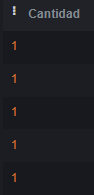

**Transformamos dicha columna**

In [223]:
df_utilizaciones['Cantidad'] = df_utilizaciones['Cantidad'].astype(int)

In [224]:
df_utilizaciones

,Fecha_Reclamacion,Afiliado_ID,Reclamacion_Cod,Diagnostico_Cod,Cantidad,Precio
0,23/10/2019,22914637,12,M45X,1,1056639.96
1,26/11/2019,58412744,9,9,1,139772.80
2,23/10/2019,5070923,16,9,1,320166.76
3,27/11/2019,5769950,13,9,1,21204.00
4,8/11/2019,24022833,12,K589,1,60636.00
...,...,...,...,...,...,...
395863,14/11/2019,4351189,16,9,15,251820.44
395864,7/9/2019,44677250,9,9,1,67208.00
395865,25/10/2019,19220270,13,9,10,475726.00
395866,11/12/2019,25627716,12,9,2,568788.00


## Hipótesis consultas desde SQL

### Hipótesis 1

 Las mujeres son quienes más reclamaciones tienen dentro de la aseguradora.

In [225]:
df_hipotesis1 = pd.DataFrame(cursor.execute('''
SELECT Sexo_desc, count(*) as Total_generos
FROM sociodemograficas AS sd
	JOIN genero as gn on sd.Sexo_codigo = gn.Sexo_Cd
    left JOIN regional as rg on sd.regional_codigo = rg.Regional_id
    left JOIN (SELECT *
				FROM utilizaciones as utl
    				JOIN reclamaciones as rcl ON utl.Reclamacion_codigo = rcl.Reclamacion_Id
   					join diagnosticos as diag ON utl.Diagnostico_Codigo = diag.Diagnostico_Codigo)
         as utlcom on sd.Afiliado_Id = utlcom.afiliado_id       
         GROUP BY Sexo_desc;''').fetchall())



df_hipotesis1 = df_hipotesis1.rename(columns={0:'Género',1:'Cantidad reclamaciones'})
df_hipotesis1


,Género,Cantidad reclamaciones
0,Femenino,291752
1,Masculino,195903
2,Sin Informacion,1


In [226]:
#Vamos a eliminar a la persona que no tiene información del género para obtener un gráfico más limpio 
df_hipotesis1 = df_hipotesis1.drop([2],axis=0)
df_hipotesis1

,Género,Cantidad reclamaciones
0,Femenino,291752
1,Masculino,195903


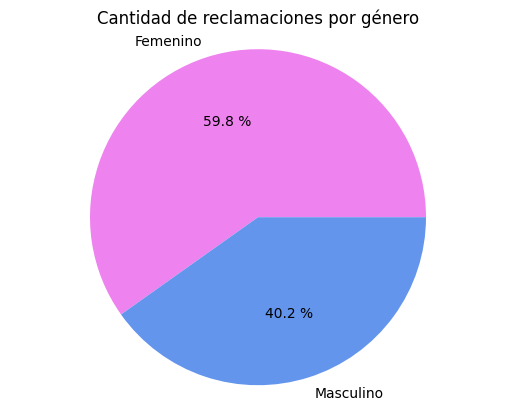

In [227]:
generos = df_hipotesis1['Género'].tolist()
cantidad_reclamaciones = df_hipotesis1['Cantidad reclamaciones'].tolist()
colores = ['Violet','CornflowerBlue']

plt.pie(cantidad_reclamaciones,labels=generos,autopct="%0.1f %%",colors=colores)
plt.axis('equal')
plt.title('Cantidad de reclamaciones por género')
plt.show()

###Hipótesis 2

 La mayor cantidad de reclamaciones se presentan en la región norte del país

In [228]:
df_hipotesis2 = pd.DataFrame(cursor.execute('''
SELECT regional_desc, COUNT(reclamacion_desc) as Total_por_regiones
FROM sociodemograficas AS sd
	JOIN genero as gn on sd.Sexo_codigo = gn.Sexo_Cd
    left JOIN regional as rg on sd.regional_codigo = rg.Regional_id
    left JOIN (SELECT *
				FROM utilizaciones as utl
    				JOIN reclamaciones as rcl ON utl.Reclamacion_codigo = rcl.Reclamacion_Id
   					join diagnosticos as diag ON utl.Diagnostico_Codigo = diag.Diagnostico_Codigo)
         as utlcom on sd.Afiliado_Id = utlcom.afiliado_id
         GROUP by regional_desc ;
''').fetchall())

df_hipotesis2= df_hipotesis2.rename(columns={0:'Descripción regional',1:'Total por regional'})
df_hipotesis2

,Descripción regional,Total por regional
0,None,0
1,REGIONAL ANTIOQUIA,62330
2,REGIONAL CENTRO,208913
3,REGIONAL EJE CAFETERO,11071
4,REGIONAL NORTE,42968
5,REGIONAL OCCIDENTE,65656
6,Sin Información,54


In [229]:
# Vamos a eliminar los datos sin información
df_hipotesis2 = df_hipotesis2.drop([0],axis=0)
df_hipotesis2 = df_hipotesis2.drop([6],axis=0)

In [230]:
df_hipotesis2

,Descripción regional,Total por regional
1,REGIONAL ANTIOQUIA,62330
2,REGIONAL CENTRO,208913
3,REGIONAL EJE CAFETERO,11071
4,REGIONAL NORTE,42968
5,REGIONAL OCCIDENTE,65656


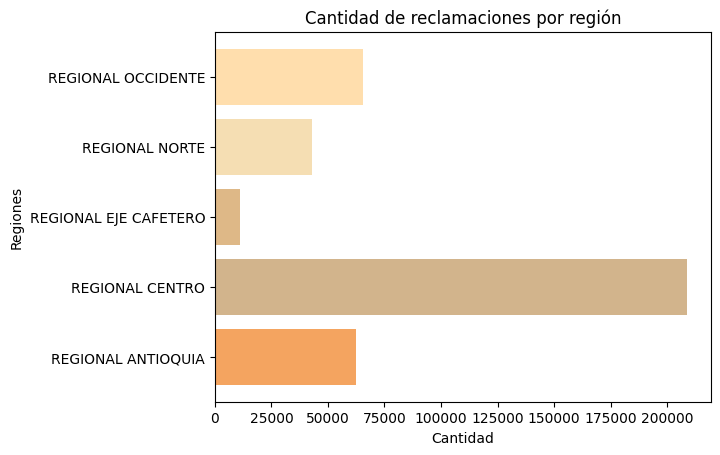

In [231]:
regionales = df_hipotesis2['Descripción regional'].tolist()
total = df_hipotesis2['Total por regional'].tolist()
colores = ['SandyBrown','Tan','Burlywood','Wheat','NavajoWhite']

plt.barh(regionales,total,color = colores)
plt.xlabel('Cantidad')
plt.ylabel('Regiones')
plt.title('Cantidad de reclamaciones por región')
plt.show()

### Hipótesis 3

Los costos más elevados de reclamaciones los abarcan las reclamaciones de la 21 a la 34, los cuales corresponden a tratamientos.

In [232]:
print('-'*40)
df_hipotesis31 = pd.DataFrame(cursor.execute('''
SELECT SUM(precio) from utilizaciones;
''').fetchall())

df_hipotesis31= df_hipotesis31.rename(columns={0:'Total costo utilizaciones'},index={0:'Valor'})
display(df_hipotesis31)
print('-'*40)

df_hipotesis32 = pd.DataFrame(cursor.execute('''
SELECT SUM(precio)From utilizaciones
WHERE reclamacion_codigo BETWEEN 21 and 34;
''').fetchall())

df_hipotesis32= df_hipotesis32.rename(columns={0:'Total costo tratamientos'},index={0:'Valor'})
display(df_hipotesis32)
print('-'*40)

df_hipotesis33 = pd.DataFrame(cursor.execute('''
SELECT SUM(precio) from utilizaciones
WHERE reclamacion_codigo not BETWEEN 21 and 34;
''').fetchall())

df_hipotesis33= df_hipotesis33.rename(columns={0:'Total costo no tratamientos'},index={0:'Valor'})
display(df_hipotesis33)
print('-'*40)

----------------------------------------


,Total costo utilizaciones
Valor,114645214657.51


----------------------------------------


,Total costo tratamientos
Valor,39856416353.96


----------------------------------------


,Total costo no tratamientos
Valor,74788798303.56


----------------------------------------


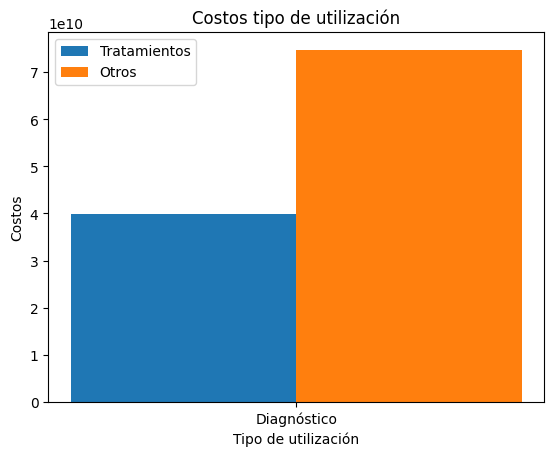

In [233]:
nombre = ['Diagnóstico']
tratamientos = df_hipotesis32['Total costo tratamientos'].tolist()
otros = df_hipotesis33['Total costo no tratamientos'].tolist()

X_axis = np.arange(len(nombre))

plt.bar(X_axis - 0.2, tratamientos, 0.4, label='Tratamientos')
plt.bar(X_axis + 0.2, otros, 0.4, label='Otros')

plt.xticks(X_axis, nombre)
plt.xlabel('Tipo de utilización')
plt.ylabel('Costos')
plt.title('Costos tipo de utilización')
plt.legend()
plt.show()


### Hipótesis 4

De los afiliados que tengan únicamente una enfermedad, aquellos que tienen enfermedades cardiovasculares son quienes representan las reclamaciones con los costos más altos para la aseguradora.

In [234]:
print('-'*50)
df_cardiovasculares = pd.DataFrame(cursor.execute('''
SELECT sum(precio)
FROM sociodemograficas AS sd
	JOIN utilizaciones as utl ON sd.Afiliado_Id = utl.Afiliado_Id
    WHERE enf_cardiovascular = 1 and cancer = 0 and epoc = 0 and hipertension = 0 and diabetes = 0;
''').fetchall())

df_cardiovasculares = df_cardiovasculares.rename(columns={0:'Total costo enfermedades cardiovasculares'},index={0:'Valor'})
display(df_cardiovasculares)
print('-'*50)

df_cancer = pd.DataFrame(cursor.execute('''
SELECT sum(precio)
FROM sociodemograficas AS sd
	JOIN utilizaciones as utl ON sd.Afiliado_Id = utl.Afiliado_Id
    WHERE enf_cardiovascular = 0 and cancer = 1 and epoc = 0 and hipertension = 0 and diabetes = 0;
''').fetchall())

df_cancer = df_cancer.rename(columns={0:'Total costo enfermedades cancer'},index={0:'Valor'})
display(df_cancer)
print('-'*50)

df_epoc = pd.DataFrame(cursor.execute('''
SELECT sum(precio)
FROM sociodemograficas AS sd
	JOIN utilizaciones as utl ON sd.Afiliado_Id = utl.Afiliado_Id
    WHERE enf_cardiovascular = 0 and cancer = 0 and epoc = 1 and hipertension = 0 and diabetes = 0;   
''').fetchall())

df_epoc = df_epoc.rename(columns={0:'Total costo enfermedades epoc'},index={0:'Valor'})
display(df_epoc)
print('-'*50)

df_hipertension = pd.DataFrame(cursor.execute('''
SELECT sum(precio)
FROM sociodemograficas AS sd
	JOIN utilizaciones as utl ON sd.Afiliado_Id = utl.Afiliado_Id
    WHERE enf_cardiovascular = 0 and cancer = 0 and epoc = 0 and hipertension = 1 and diabetes = 0;     
''').fetchall())

df_hipertension = df_hipertension.rename(columns={0:'Total costo enfermedades hipertensión'},index={0:'Valor'})
display(df_hipertension)
print('-'*50)

df_diabetes = pd.DataFrame(cursor.execute('''
SELECT sum(precio)
FROM sociodemograficas AS sd
	JOIN utilizaciones as utl ON sd.Afiliado_Id = utl.Afiliado_Id
    WHERE enf_cardiovascular = 0 and cancer = 0 and epoc = 0 and hipertension = 0 and diabetes = 1;     
''').fetchall())

df_diabetes = df_diabetes.rename(columns={0:'Total costo enfermedades diabetes'},index={0:'Valor'})
display(df_diabetes)
print('-'*50)

--------------------------------------------------


,Total costo enfermedades cardiovasculares
Valor,527881356.04


--------------------------------------------------


,Total costo enfermedades cancer
Valor,9567139260.00


--------------------------------------------------


,Total costo enfermedades epoc
Valor,429694086.36


--------------------------------------------------


,Total costo enfermedades hipertensión
Valor,9947449706.40


--------------------------------------------------


,Total costo enfermedades diabetes
Valor,1228899575.80


--------------------------------------------------


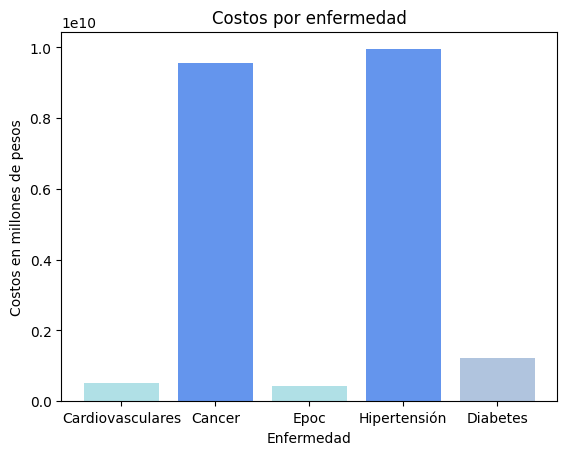

In [235]:
enfermedades = ['Cardiovasculares','Cancer','Epoc','Hipertensión','Diabetes']
costos = [df_cardiovasculares.iloc[0,0],df_cancer.iloc[0,0],df_epoc.iloc[0,0],df_hipertension.iloc[0,0],df_diabetes.iloc[0,0]]
colores = ['PowderBlue','CornflowerBlue','PowderBlue','CornflowerBlue','LightSteelBlue']

plt.bar(enfermedades,costos,color=colores)
plt.title('Costos por enfermedad')
plt.xlabel('Enfermedad')
plt.ylabel('Costos en millones de pesos')
plt.show()


### Hipótesis 5

Los diagnósticos más recurrentes suelen contribuir en mayor cantidad en los costos para la aseguradora. 

In [236]:
df_hipotesis5 = pd.DataFrame(cursor.execute('''
SELECT diagnostico_desc, count(*) as Cantidad, precio
FROM utilizaciones as utl
	JOIN reclamaciones as rcl ON utl.Reclamacion_codigo = rcl.Reclamacion_Id
	join diagnosticos as diag ON utl.Diagnostico_Codigo = diag.Diagnostico_Codigo
    GROUP by diagnostico_desc
    ORDER by precio asc;     
''').fetchall())

df_hipotesis5 = df_hipotesis5.rename(columns={0:'Diagnóstico',1:'Cantidad',2:'Costos'})
display(df_hipotesis5)

,Diagnóstico,Cantidad,Costos
0,SUBLUXACIÓN DE LA SÍNFISIS (DEL PUBIS) EN EL E...,3,1428.48
1,TUMOR MALIGNO DE LA GLÁNDULA TIROIDES,182,2511.00
2,HIPOTIROIDISMO CONSECUTIVO A PROCEDIMIENTOS,32,3169.44
3,ESTRECHEZ ARTERIAL,1,4094.48
4,NEUROMIELITIS ÓPTICA [DEVIC],7,6621.60
...,...,...,...
2695,FLEBITIS Y TROMBOFLEBITIS DE OTROS VASOS PROFU...,1,152031560.30
2696,RESPIRACIÓN CON LA BOCA,2,158659860.00
2697,"DESNUTRICIÓN PROTEICOCALÓRICA, NO ESPECIFICADA",1,169715395.00
2698,ENFERMEDAD TÓXICA DEL HÍGADO CON CIRROSIS Y FI...,1,230207621.90


### Hipótesis 6

Las reclamaciones con relación a los tratamientos suelen ser más solicitadas en comparación con aquellas que no hacen parte de algún tipo de tratamiento.

In [237]:
print('-'*25)
df_hipotesis61 = pd.DataFrame(cursor.execute('''
SELECT count(reclamacion_codigo) FROM utilizaciones
where reclamacion_codigo BETWEEN 21 and 34;   
''').fetchall())

df_hipotesis61 = df_hipotesis61.rename(columns={0:'Tratamientos'}, index={0:'Total'})
display(df_hipotesis61)
print('-'*25)

df_hipotesis62 = pd.DataFrame(cursor.execute('''
SELECT count(reclamacion_codigo) FROM utilizaciones
where reclamacion_codigo not BETWEEN 21 and 34;  
''').fetchall())

df_hipotesis62 = df_hipotesis62.rename(columns={0:'No tratamientos'}, index={0:'Total'})
display(df_hipotesis62)
print('-'*25)


-------------------------


,Tratamientos
Total,17444


-------------------------


,No tratamientos
Total,378424


-------------------------


### Hipótesis 7 

La población con más de cincuenta años presenta un mayor costo para la aseguradora 

In [238]:
print('-'*70)
df_hipotesis71 =  pd.DataFrame(cursor.execute('''
SELECT sd.afiliado_id, sd.FechaNacimiento, sum(utl.Precio) as Costo_por_paciente, 
CASE when fechanacimiento < 25204 then 'Mayores 50' ELSE 'Menores' end Edad
FROM sociodemograficas as sd 
	join utilizaciones as utl on sd.Afiliado_Id = utl.Afiliado_Id
    GROUP by sd.afiliado_id;   
''').fetchall())

df_hipotesis71 = df_hipotesis71.rename(columns={0:'AfiliadoID',1:'Fecha Nacimiento',2:'Costo por paciente',3:'Edad'})
display(df_hipotesis71)
print('-'*70)


df_hipotesis72 =  pd.DataFrame(cursor.execute('''
SELECt sum(utl.Precio) as Costo_afiliados_mayores
FROM sociodemograficas as sd 
	join utilizaciones as utl on sd.Afiliado_Id = utl.Afiliado_Id
    where fechanacimiento <= 25204;  
''').fetchall())

df_hipotesis72 = df_hipotesis72.rename(columns={0:'Costo Mayores de 50'},index={0:'Valor'})
display(df_hipotesis72)
print('-'*70)



df_hipotesis73 =  pd.DataFrame(cursor.execute('''
SELECt sum(utl.Precio) as Costo_afiliados_mayores
FROM sociodemograficas as sd 
	join utilizaciones as utl on sd.Afiliado_Id = utl.Afiliado_Id
    where fechanacimiento > 25204; 
''').fetchall())

df_hipotesis73 = df_hipotesis73.rename(columns={0:'Costo Menores de 50'},index={0:'Valor'})
display(df_hipotesis73)
print('-'*70)




----------------------------------------------------------------------


,AfiliadoID,Fecha Nacimiento,Costo por paciente,Edad
0,738288,28072,224128.76,Menores
1,738294,23392,38328.40,Mayores 50
2,738318,15053,16318297.08,Mayores 50
3,738347,27596,1055230.08,Menores
4,738348,23504,506416.00,Mayores 50
...,...,...,...,...
121536,59517176,38355,960008.00,Menores
121537,59517865,41422,181271.88,Menores
121538,59527103,38397,114776.88,Menores
121539,59534420,31607,1595469.56,Menores


----------------------------------------------------------------------


,Costo Mayores de 50
Valor,41986176836.06


----------------------------------------------------------------------


,Costo Menores de 50
Valor,70298764183.74


----------------------------------------------------------------------


In [239]:
display(df_hipotesis72)
display(df_hipotesis73)

,Costo Mayores de 50
Valor,41986176836.06


,Costo Menores de 50
Valor,70298764183.74


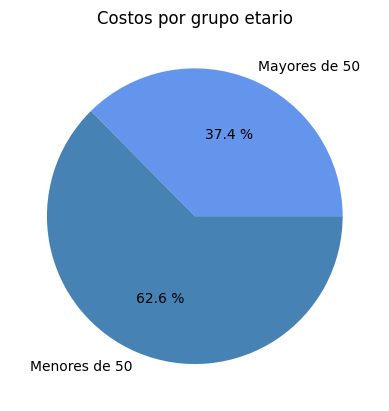

In [240]:
grupo_etario = ['Mayores de 50','Menores de 50']
costos_etarios = [df_hipotesis72.iloc[0,0],df_hipotesis73.iloc[0,0]]
colores = ['CornflowerBlue','SteelBlue']

plt.pie(costos_etarios,labels=grupo_etario,autopct="%0.1f %%",colors=colores)
plt.title('Costos por grupo etario')
plt.show()

##Preguntas de negocio desde Python#

### Hipótesis 8

¿Cuáles son los diez afiliados que más reclamaciones solicitan? 

In [241]:
df_cantidad = df_utilizaciones.groupby('Afiliado_ID')['Cantidad'].sum()
df_cantidad = df_cantidad.sort_values(ascending = False)

df_cantidad = pd.DataFrame(df_cantidad.head(10))
df_cantidad

,Cantidad
Afiliado_ID,
56682173,285
8133470,225
24695323,203
58181850,160
39327324,157
35423628,146
9732625,143
55030322,129
46046049,120


Los diez afiliados con más reclamaciones se muestran en la tabla anterior 

In [242]:
#Exportar DataFrame a Excel
df_cantidad.to_excel('DataFrame_Proyecto.xlsx', sheet_name = 'Sheet1', index = True)

**Resultados obtenidos en SQL**

In [243]:
'''
SELECT afiliado_id,SUM(CANTIDAD) as Cantidad FROM utilizaciones
GROUP by afiliado_id
ORDER BY SUM(cantidad) DESC
limit 10;
'''

'\nSELECT afiliado_id,SUM(CANTIDAD) as Cantidad FROM utilizaciones\nGROUP by afiliado_id\nORDER BY SUM(cantidad) DESC\nlimit 10;\n'

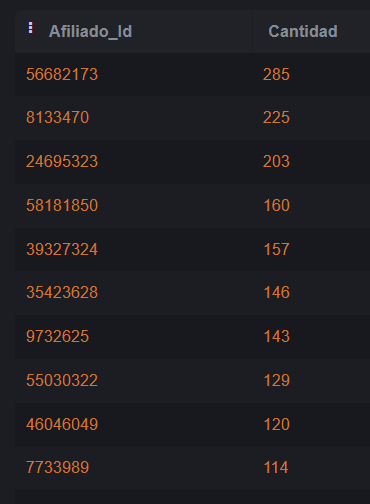

### Hipótesis 9

¿Cuales son los diez afiliados que más costos representan a la aseguradora?

In [244]:
df_costos = df_utilizaciones.groupby('Afiliado_ID')['Precio'].sum()
df_costos = df_costos.sort_values(ascending = False)

df_costos = pd.DataFrame(df_costos.head(10))
df_costos
df_costos = df_costos.reset_index()
df_costos

,Afiliado_ID,Precio
0,16211397,547239132.42
1,48112994,272704325.34
2,4696275,230270985.90
3,8046935,227988287.30
4,15520328,184915584.04
5,5055740,183146240.48
6,8001431,178880377.58
7,4219884,177598845.00
8,9819800,173768992.14
9,1762631,170837215.56


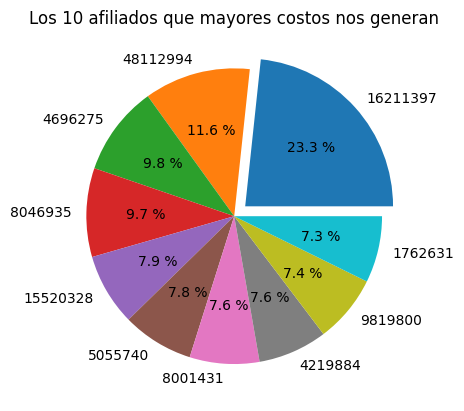

In [245]:
afiliados = df_costos['Afiliado_ID'].tolist()
costos = df_costos['Precio'].tolist()
explode = [0.1,0,0,0,0,0,0,0,0,0]

plt.pie(costos,labels=afiliados,autopct="%0.1f %%",explode=explode)
plt.title('Los 10 afiliados que mayores costos nos generan')
plt.show()

**Resultados obtenidos en SQL**

In [246]:
'''
SELECT afiliado_id,SUM(precio) FROM utilizaciones
GROUP by afiliado_id
ORDER BY SUM(precio) DESC
limit 10;
'''

'\nSELECT afiliado_id,SUM(precio) FROM utilizaciones\nGROUP by afiliado_id\nORDER BY SUM(precio) DESC\nlimit 10;\n'

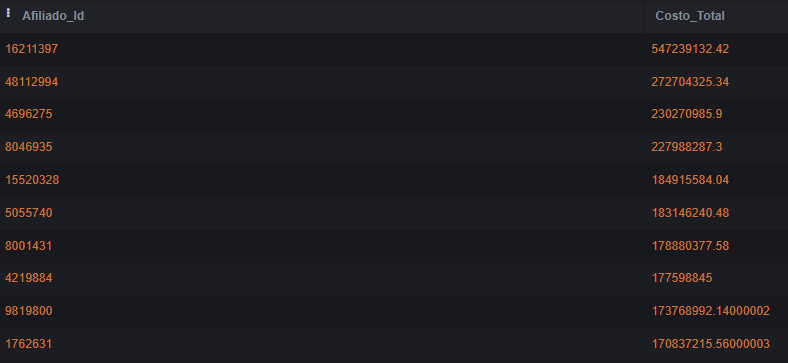

####Transformación 2 

Realizamos una transformación de los datos para suavizarlos y que halla una mayor claridad de los precios de las reclamaciones de los asegurados. Convertimos a tipo entero.

In [247]:
df_costos.astype(int)

,Afiliado_ID,Precio
0,16211397,547239132
1,48112994,272704325
2,4696275,230270985
3,8046935,227988287
4,15520328,184915584
5,5055740,183146240
6,8001431,178880377
7,4219884,177598845
8,9819800,173768992
9,1762631,170837215


### Hipótesis 10

¿Cúal es la enfermedad que más prevalece en los afiliados de la aseguradora?

In [248]:
df_enfe = df_sociodemograficas[['Cancer',	'EPOC',	'Diabetes',	'Hipertension',	'Enf_Cardiovascular']].sum()

df_enf = pd.DataFrame(df_enfe, columns = ['Presencia_en_afiliados'])
df_enf = df_enf.reset_index()
df_enf
df_enf = df_enf.rename(columns={'index':'Enfermedad','Presencia_en_afiliados':'Pacientes diagnosticados'})
df_enf


,Enfermedad,Pacientes diagnosticados
0,Cancer,4149
1,EPOC,1116
2,Diabetes,3239
3,Hipertension,15187
4,Enf_Cardiovascular,883


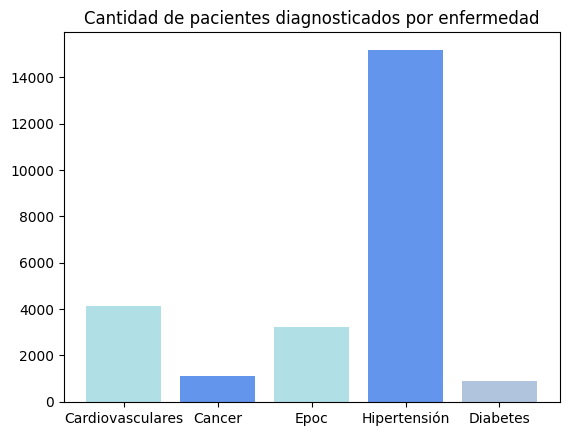

In [249]:
enfermedad = df_enf['Enfermedad'].tolist()
diagnosticados = df_enf['Pacientes diagnosticados']
colores = ['PowderBlue','CornflowerBlue','PowderBlue','CornflowerBlue','LightSteelBlue']

plt.bar(enfermedades,diagnosticados,color=colores)
plt.title('Cantidad de pacientes diagnosticados por enfermedad')
plt.show()

La enfermedad que más prevalece es la Hipertensión, ya que esta se encuentra en 15.187 afiliados

#### Transformación 3

En esta transformación se quiere obtener los porcentajes de afiliados que sufren de cada enfermedad para tener mayor claridad de los datos. 

In [250]:
lista = [df_enf['Pacientes diagnosticados'].sum()]
df_lista = pd.DataFrame(lista,columns=['Pacientes diagnosticados'],index=['Total'])

df_enf = df_enf.append(df_lista, ignore_index=False)
df_enf

<ipython-input-250-ed36b7e17ede>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_enf = df_enf.append(df_lista, ignore_index=False)


,Enfermedad,Pacientes diagnosticados
0,Cancer,4149
1,EPOC,1116
2,Diabetes,3239
3,Hipertension,15187
4,Enf_Cardiovascular,883
Total,NaN,24574


In [251]:
df_enf['Porcentajes'] = round((df_enf['Pacientes diagnosticados']/df_enf['Pacientes diagnosticados']['Total'])*100,1)
df_enf

,Enfermedad,Pacientes diagnosticados,Porcentajes
0,Cancer,4149,16.90
1,EPOC,1116,4.50
2,Diabetes,3239,13.20
3,Hipertension,15187,61.80
4,Enf_Cardiovascular,883,3.60
Total,NaN,24574,100.00


**Resultados obtenidos en SQL**

In [252]:
'''
SELECT sum(cancer) as Total_Cancer, 
       sum(epoc) as Total_EPOC, 
       sum(diabetes) as Total_Diabetes,
       sum(hipertension) as Total_Hipertensión, 
       sum(enf_cardiovascular) as Total_Cardiovascular
FROM sociodemograficas
'''

'\nSELECT sum(cancer) as Total_Cancer, \n       sum(epoc) as Total_EPOC, \n       sum(diabetes) as Total_Diabetes,\n       sum(hipertension) as Total_Hipertensión, \n       sum(enf_cardiovascular) as Total_Cardiovascular\nFROM sociodemograficas\n'

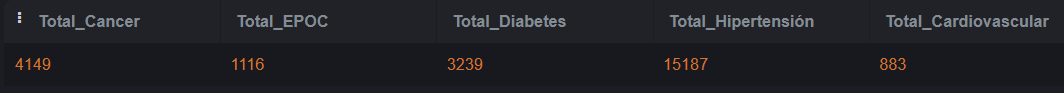

### Hipótesis 11

De las enfermedades cómo *Cáncer, EPOC, Diabetes,	Hipertensión y Cardiovascular*. ¿Cuál es la proporción de afiliados que no poseen ninguna de estas?

In [253]:
#Tabla de afiliados que no tiene ninguna enferemedad 
df_sociodemograficas[((df_sociodemograficas['Cancer'] < 1) 
& (df_sociodemograficas['EPOC'] < 1) 
& (df_sociodemograficas['Diabetes'] < 1) 
& (df_sociodemograficas['Hipertension'] < 1) 
& (df_sociodemograficas['Enf_Cardiovascular'] < 1))]

,Genero,Fecha_Nacimiento,Regional_Codigo,Cancer,EPOC,Diabetes,Hipertension,Enf_Cardiovascular
Afiliado_ID,,,,,,,,
738288,M,28072,1,0,0,0,0,0
738294,M,23392,2,0,0,0,0,0
738303,F,27177,3,0,0,0,0,0
738347,F,27596,2,0,0,0,0,0
738348,M,23504,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
59559606,F,38164,2,0,0,0,0,0
59564764,F,38429,2,0,0,0,0,0
59565065,F,38425,2,0,0,0,0,0


In [254]:
df_sociodemograficas.shape[0]

218205

In [255]:
sin_enfermedades = ((df_sociodemograficas['Cancer'] < 1)
& (df_sociodemograficas['EPOC'] < 1)
& (df_sociodemograficas['Diabetes'] < 1)
& (df_sociodemograficas['Hipertension'] < 1)
& (df_sociodemograficas['Enf_Cardiovascular'] < 1)) 

proporcion = round((df_sociodemograficas[sin_enfermedades].shape[0]/df_sociodemograficas.shape[0]*100),2)

print('La cantidad de afiliados sin ninguna enfermedad es: {}, '
      '\nlo que corresponde a una proporción de {}% del total de afiliados para la aseguradora'
      .format(df_sociodemograficas[sin_enfermedades].shape[0], proporcion))

La cantidad de afiliados sin ninguna enfermedad es: 198143, 
lo que corresponde a una proporción de 90.81% del total de afiliados para la aseguradora


Por los resultados obtenidos, el 90.81 % de los afiliados no presentan ninguna de las cinco enfermedades diagnosticadas

###Hipótesis 12

¿Los costos asignados al mayor número de reclamaciones se encuentran por encima del promedio de estos costos?

Calculamos primero el promedio de los costos

In [256]:
promedio = round(df_utilizaciones['Precio'].mean(), 2)
print('Promedio de los costos: ', promedio)

Promedio de los costos:  289604.65


In [257]:
df_cantidad2 = df_utilizaciones.groupby('Afiliado_ID').agg({'Cantidad' : 'sum', 'Precio' : 'sum'})
df_cantidad2 = df_cantidad2.sort_values(by = 'Cantidad', ascending = False)

df_cantidad2 = pd.DataFrame(df_cantidad2.head(10))
df_cantidad2

,Cantidad,Precio
Afiliado_ID,,
56682173,285,9130599.88
8133470,225,2056031.60
24695323,203,26668982.56
58181850,160,4525132.00
39327324,157,3424210.40
35423628,146,2931980.00
9732625,143,4593159.64
55030322,129,4122249.80
46046049,120,2375112.12


#### Transformación 4

En la siguiente tranformación, calculamos en promedio cuánto le cuesta individualmente a la aseguradora los diez primeros afiliados que más riesgos tienen. 

In [258]:
df_cantidad2['Precio unitario'] = round(df_cantidad2['Precio']/df_cantidad2['Cantidad'],3)
df_cantidad2

,Cantidad,Precio,Precio unitario
Afiliado_ID,,,
56682173,285,9130599.88,32037.19
8133470,225,2056031.60,9137.92
24695323,203,26668982.56,131374.30
58181850,160,4525132.00,28282.08
39327324,157,3424210.40,21810.26
35423628,146,2931980.00,20082.06
9732625,143,4593159.64,32120.00
55030322,129,4122249.80,31955.42
46046049,120,2375112.12,19792.60


### Hipótesis 13

¿Cuál es el año en el que más reclamaciones se han realizaron?

In [259]:
fechas = df_utilizaciones['Fecha_Reclamacion']
anos = []
for i in fechas:
  ano = i[-4:]
  anos.append(ano)

df_anos = pd.DataFrame(anos)
df_cantidad = pd.DataFrame(df_utilizaciones['Cantidad'])
df_anos['Numero_Reclamaciones'] = df_cantidad

df_anos.columns = ['Año','Numero_Reclamaciones']
df_anos = df_anos.groupby('Año')['Numero_Reclamaciones'].sum()
df_anos = df_anos.sort_values(ascending=False)

df_anos = pd.DataFrame(df_anos)
df_anos = df_anos.reset_index()
df_anos = df_anos.sort_values(by='Año',ascending=True)
df_anos

,Año,Numero_Reclamaciones
4,2014,15
5,2015,3
3,2016,18
2,2017,34
1,2018,1046
0,2019,594455


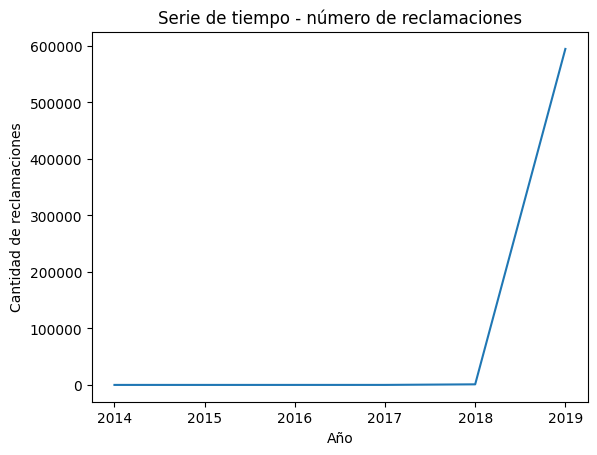

In [260]:
años = df_anos['Año'].tolist()
reclamaciones = df_anos['Numero_Reclamaciones'].tolist()

plt.plot(años,reclamaciones)
plt.title('Serie de tiempo - número de reclamaciones')
plt.xlabel('Año')
plt.ylabel('Cantidad de reclamaciones')
plt.show()


El año en que más reclamaciones se realizaron fue en el 2019

###Hipótesis 14

Se espera que en la región del eje cafetero (Codigo Regional 2) , la cual es la más pequeña, haya una menor demanda de reclamaciones. 

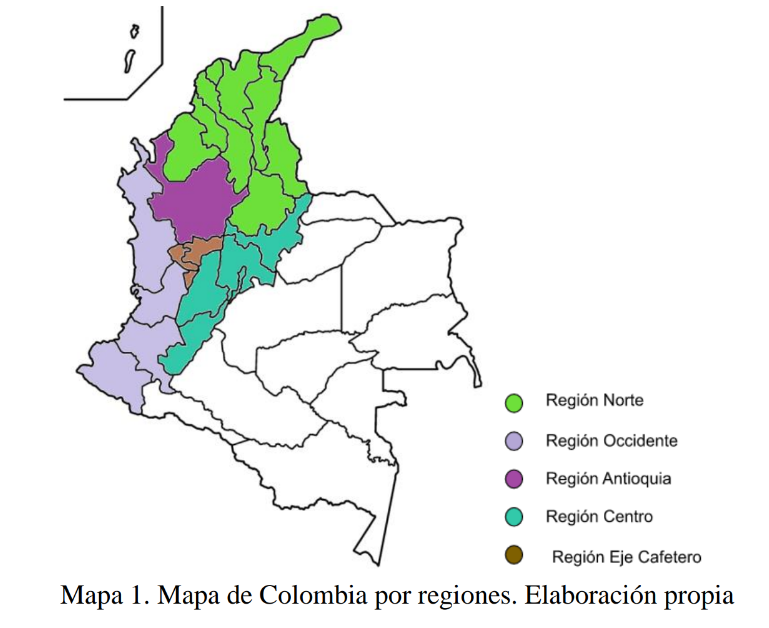

In [261]:
df_utilizaciones
df_utilizaciones.set_index('Afiliado_ID')

,Fecha_Reclamacion,Reclamacion_Cod,Diagnostico_Cod,Cantidad,Precio
Afiliado_ID,,,,,
22914637,23/10/2019,12,M45X,1,1056639.96
58412744,26/11/2019,9,9,1,139772.80
5070923,23/10/2019,16,9,1,320166.76
5769950,27/11/2019,13,9,1,21204.00
24022833,8/11/2019,12,K589,1,60636.00
...,...,...,...,...,...
4351189,14/11/2019,16,9,15,251820.44
44677250,7/9/2019,9,9,1,67208.00
19220270,25/10/2019,13,9,10,475726.00


In [262]:
join1 = df_utilizaciones.join(df_sociodemograficas,on='Afiliado_ID')

In [263]:
df_demandareg = join1.groupby('Regional_Codigo')['Cantidad'].sum()
df_demandareg.sort_values(ascending=False)
df_demandareg = pd.DataFrame(df_demandareg)
df_demandareg.index.name = 'ID_Regional'

df_demandareg = df_demandareg.join(df_regionales,on='ID_Regional').sort_values(ascending=False, by = 'Cantidad')
df_demandareg = df_demandareg.reset_index()
df_demandareg.drop(df_demandareg[df_demandareg['Descripción']=='Sin Información'].index,inplace=True)

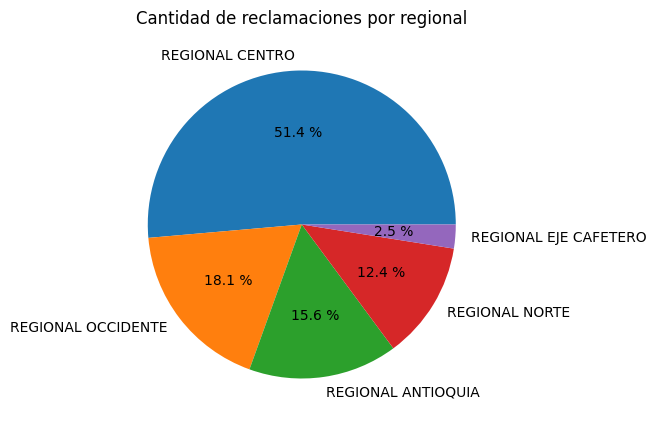

In [264]:
df_demandareg

regionales = df_demandareg['Descripción'].tolist()
cantidades = df_demandareg['Cantidad'].tolist()

plt.figure(figsize=(5,5))
plt.pie(cantidades,labels=regionales,autopct="%0.1f %%")
plt.title('Cantidad de reclamaciones por regional')
plt.show()



# Análisis exploratorio

In [265]:
import matplotlib.pyplot as plt

Observemos cómo se distribuyen los afiliados dependiendo de su género mediante gráficas. 

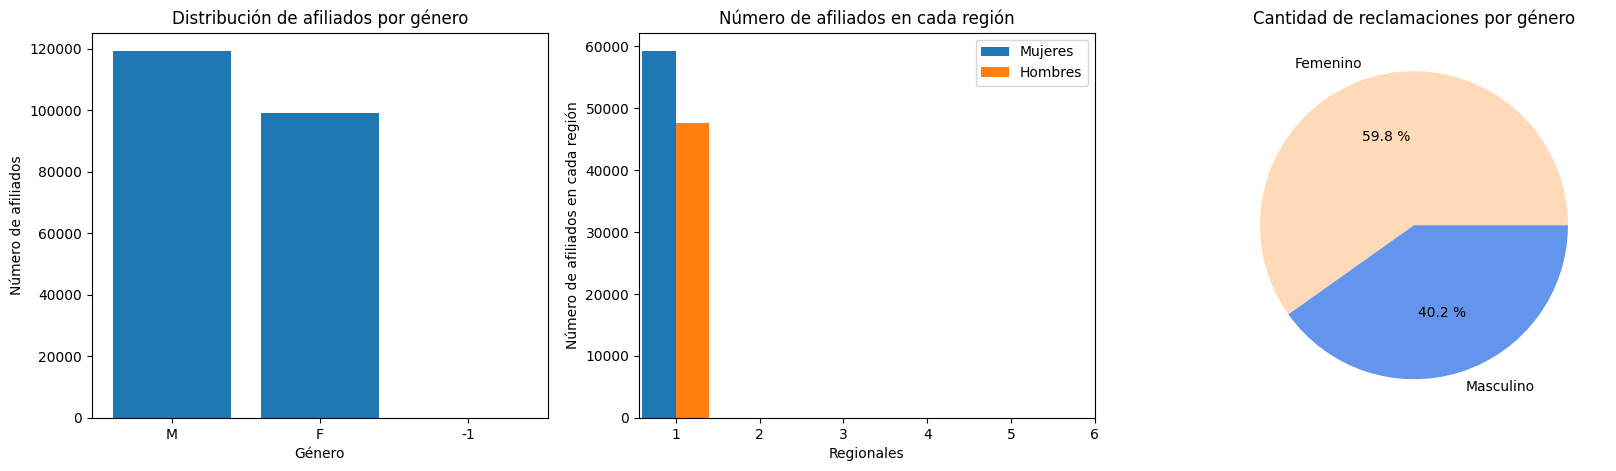

In [266]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
# ------------------- Axis 0 -----------------------
x_values = df_sociodemograficas['Genero'].unique()
y_values = df_sociodemograficas['Genero'].value_counts().tolist()
ax[0].bar(x_values,y_values)
ax[0].set_title('Distribución de afiliados por género')
ax[0].set_xlabel('Género')
ax[0].set_ylabel('Número de afiliados')

# -------------------- Axis 1 ---------------------
df_sociodemograficas.drop(df_sociodemograficas[(df_sociodemograficas['Genero']=='-1')|(df_sociodemograficas['Regional_Codigo']=='#N/D')].index,inplace=True)
genero_regional = pd.DataFrame(df_sociodemograficas.groupby('Regional_Codigo')['Genero'].value_counts())
genero_regional = genero_regional.rename(columns={'Genero':'Total'})
genero_regional = genero_regional.reset_index()

regiones  = genero_regional['Regional_Codigo'].unique().tolist()
cantidad_F = genero_regional.loc[genero_regional['Genero'] == 'F', 'Total'].tolist()
cantidad_M = genero_regional.loc[genero_regional['Genero'] == 'M', 'Total'].tolist()
ax[1].bar(X_axis - 0.2, cantidad_F, 0.4, label = 'Mujeres')
ax[1].bar(X_axis + 0.2, cantidad_M, 0.4, label = 'Hombres')

X_axis = np.arange(len(regiones))
ax[1].set_xticks(X_axis, regiones)
ax[1].set_xlabel("Regionales")
ax[1].set_ylabel('Número de afiliados en cada región')
ax[1].set_title("Número de afiliados en cada región")
ax[1].legend()

#--------------------Axis 2 
generos = df_hipotesis1['Género'].tolist()
cantidad_reclamaciones = df_hipotesis1['Cantidad reclamaciones'].tolist()
colores = ['PeachPuff','CornflowerBlue']

ax[2].pie(cantidad_reclamaciones,labels=generos,autopct="%0.1f %%",colors=colores)
ax[2].set_title('Cantidad de reclamaciones por género')
plt.show()

Análisis de la variable 'Precios' que indica los costos asociados a cada uno de los afiliados 

In [269]:
pd.set_option('display.float_format', '{:.2f}'.format)
dfutilizaciones_describe = df_utilizaciones.describe()
dfutilizaciones_describe
dfutilizaciones_describe.drop(['Afiliado_ID'],axis=1,inplace=True)
dfutilizaciones_describe

,Cantidad,Precio
count,395868.00,395868.00
mean,1.50,289604.65
std,2.34,2088675.78
min,0.00,2.48
25%,1.00,54150.80
50%,1.00,68102.66
75%,1.00,142325.03
max,210.00,541000682.50


Resulta interesante identificar qué afiliado representa un costo de aproximadamente 541.000.682 millones de pesos. Ademas, es preciso identificar qué diagnóstico tiene. 

In [270]:
df_utilizaciones.loc[df_utilizaciones['Precio']==df_utilizaciones['Precio'].max()]

,Fecha_Reclamacion,Afiliado_ID,Reclamacion_Cod,Diagnostico_Cod,Cantidad,Precio
330806,4/12/2019,16211397,30,D71X,1,541000682.50


In [276]:
chequeo = df_diagnosticos.reset_index()


In [277]:
chequeo.loc[chequeo['Codigo']=='D71X']

,Codigo,Descripción
418,D71X,TRASTORNOS FUNCIONALES DE LOS POLIMORFONUCLEAR...


Veamos cómo se distribuye la variable precios. 

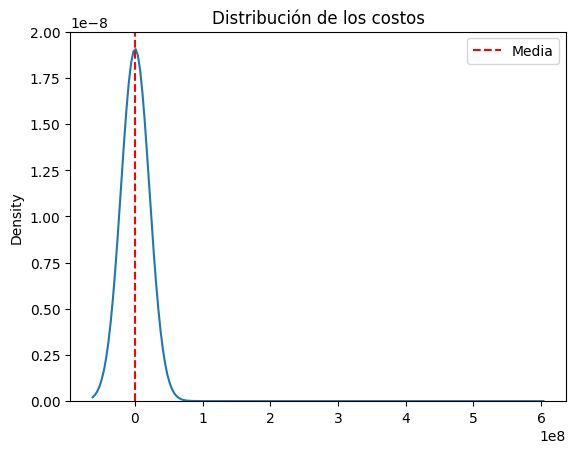

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

datos = df_utilizaciones['Precio'].tolist()

sns.kdeplot(datos, bw_method=10)
media = df_utilizaciones['Precio'].mean()

plt.axvline(x=media, color='red', linestyle='--', label='Media')
plt.title('Distribución de los costos')
plt.legend()
plt.show()


In [272]:
mayores = df_utilizaciones.sort_values(by=['Precio'],ascending=False)
mayores.head(120)


,Fecha_Reclamacion,Afiliado_ID,Reclamacion_Cod,Diagnostico_Cod,Cantidad,Precio
330806,4/12/2019,16211397,30,D71X,1,541000682.50
82067,1/11/2019,48112994,31,Q234,1,258618841.70
290450,4/11/2019,4696275,31,K717,1,230207621.90
216728,29/9/2019,8046935,31,I10X,1,227988287.30
72684,12/9/2019,4219884,31,I500,1,177408629.00
...,...,...,...,...,...,...
86799,30/10/2019,27993431,31,R599,1,43509474.64
192483,22/11/2019,25817757,31,G459,1,43270924.68
27897,26/9/2019,3698383,31,J15X,1,43084550.20
186144,12/12/2018,16417490,21,C341,1,42746102.12


In [273]:
from scipy.stats import shapiro
stat, p_value = shapiro(df_utilizaciones['Precio'].values)

print("Estadístico de prueba:", stat)
print("Valor p:", p_value)

# Evaluar la significancia del resultado
alpha = 0.05
if p_value > alpha:
    print("No se puede rechazar la hipótesis nula (los datos siguen una distribución normal)")
else:
    print("Se rechaza la hipótesis nula (los datos no siguen una distribución normal)")

Estadístico de prueba: 0.06813079118728638
Valor p: 0.0
Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
